# **Kaggle notebook and API set up**

In [1]:
!pip install kaggle # installing kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing files
from google.colab import files

In [3]:
# uploading a json file download from Kaggel
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"susaiignesh","key":"4e82e7c97143bc0c1269429e476e9692"}'}

In [ ]:
# to remove the current folder
rm -r /root/.kaggle

In [4]:
# this will create floder for us to save a json file
!mkdir ~/.kaggle

In [5]:
# cp command actully used to copy the file into the new folder that we're going to create

!cp /content/kaggle.json ~/.kaggle/

In [6]:
# finaly we will call the chmod 600 to allow us to read and wirte to the file
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions list # competition list

ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection               2023-06-14 23:59:00  Featured         $1,000,000        123           False  
https://www.kaggle.com/competitions/asl-signs                                      2023-05-01 23:59:00  Research           $100,000        663           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction      2023-06-08 23:59:00  Research           $100,000        202           False  
https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction  2023-05-18 23:59:00  Featured            $60,000        753           False  
https://www.kaggle.com/competition

In [8]:
# checking the list of datsets
!kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zusmani/pakistan-toshakhana-files                                  Pakistan ToshaKhana Files                             1MB  2023-03-15 16:25:43           2355        107  1.0              
ramkrijal/tomato-daily-prices                                      Tomato Daily Prices                                  10KB  2023-03-10 15:39:14           1359         45  1.0              
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                      8KB  2023-02-01 12:22:51          14596        477  1.0              
datascientistanna/customers-dataset          

#**Introduction**

* There is an imbalance in the education system during the Covid19 pandemic and most of the students don't even have access to educational tools and online learning platforms. There is an urgent need to come up with solutions and by using LearnPlatform dataset we will figure some of the common patterns and identify the clusters based on demography, geography, and accessibility.

# **Project Goals**
* In this project, we will be using data analysis tools to figure out trends in digital learning and how it is effective towards improvised communities. We will be comparing districts and states on factors like demography, internet access, learning product access, and finance. In the end, we will summarize our report and point towards the areas that need our more attention to make education accessible for all students the United States.

**(I) Downloading a dataset from kaggle**

In [9]:
# for download the datasets 
#!kaggle competitions download -c (dataset name or path)

In [10]:
!kaggle competitions download -c learnplatform-covid19-impact-on-digital-learning

 99% 123M/124M [00:01<00:00, 84.7MB/s]
100% 124M/124M [00:01<00:00, 87.0MB/s]


In [11]:
!unzip learnplatform-covid19-impact-on-digital-learning.zip # unziping the dataset

Archive:  learnplatform-covid19-impact-on-digital-learning.zip
  inflating: README.md               
  inflating: districts_info.csv      
  inflating: engagement_data/1000.csv  
  inflating: engagement_data/1039.csv  
  inflating: engagement_data/1044.csv  
  inflating: engagement_data/1052.csv  
  inflating: engagement_data/1131.csv  
  inflating: engagement_data/1142.csv  
  inflating: engagement_data/1179.csv  
  inflating: engagement_data/1204.csv  
  inflating: engagement_data/1270.csv  
  inflating: engagement_data/1324.csv  
  inflating: engagement_data/1444.csv  
  inflating: engagement_data/1450.csv  
  inflating: engagement_data/1470.csv  
  inflating: engagement_data/1536.csv  
  inflating: engagement_data/1549.csv  
  inflating: engagement_data/1558.csv  
  inflating: engagement_data/1570.csv  
  inflating: engagement_data/1584.csv  
  inflating: engagement_data/1624.csv  
  inflating: engagement_data/1705.csv  
  inflating: engagement_data/1712.csv  
  inflating: engageme

# **Import relevant libraries**

* I will be mostly using Altair, Seaborn, and Plotly for data visualization. For data analysis, I will be using Numpy and Pandas.

In [12]:
import numpy as np 
import pandas as pd 
import math

import glob
import os

import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

# **Description of data**

* We have three types of Dataset.



* Products data contains Sevice names, Companies, and educational sectors.

* District data contains Demography, Locations, and Educational Spendings.

* Engagement data contains student's engagement with different products per day.

#**Product**

* The product file products_info.csv includes information about the characteristics of the top 372 products with most users in 2020. The categories listed in this file are part of LearnPlatform's product taxonomy.



| Name  | 	Description |
|-------|---------------|
| LP ID | The unique identifier of the product |
| URL	| Web Link to the specific product|
| Product Name |	Name of the specific product|
| Provider/Company Name	|Name of the product provider|
| Sector(s) |	Sector of education where the product is used|
| Primary Essential Function | The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled||


**Loading Data Educational Product Data**

* As we can see we have product names, Companies, and Sector data with Primary Functions.

In [13]:
products_data = pd.read_csv("products_info.csv")
products_data.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


# **District**

* The district file districts_info.csv includes information about the characteristics of school districts, including data from.

* NCES (2018-19),
* FCC (Dec 2018), and
* Edunomics Lab.

| Name | 	Description|
|------|--------------|
| district_id|The unique identifier of the school district|
|state| The state where the district resides in|
| locale|	NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information|
|pct_black/hispanic| Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data|
| pct_free/reduced| 	Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data|
|countyconnectionsratio| ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information|
| pptotalraw| Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.|

#**Loading data district data**

* We have different states, locale, educational spending and more importanly we have Demographical data.

In [14]:
districts_data = pd.read_csv("districts_info.csv")
districts_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


# **Engagement data**
* The engagement data are aggregated at school district level, and each file in the folder engagement_data represents data from one school district.

|Name|Description|
|-----|-----------|
|time| 	date in "YYYY-MM-DD"|
|lp_id|The unique identifier of the product|
|pct_access|Percentage of students in the district have at least one page-load event of a given product and on a given day|
|engagement_index	| Total page-load events per one thousand students of a given product and on a given day|

**Note:Our engagement data is split out into various.csv files, thus we must integrate them all into a single.csv file.**

In [15]:
import pandas as pd
import os

In [16]:
# Set the folder path where the CSV files are stored
folder_path = '/content/engagement_data'

# Get a list of all CSV files in the folder and also cheking the all file are in same formate
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each CSV file and append its data to the combined data DataFrame
for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    combined_data = combined_data.append(data, ignore_index=True)


# Write the combined data to a CSV file
combined_data.to_csv('combined_data.csv', index=False)

<ipython-input-16-2208c18f096c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data, ignore_index=True)
<ipython-input-16-2208c18f096c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data, ignore_index=True)
<ipython-input-16-2208c18f096c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data, ignore_index=True)
<ipython-input-16-2208c18f096c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data, ignore_index=True)
<ipython-input-16-2208c18f096c>:13: FutureWarning: The frame.append 

#**Loading Data Engagement Data**

* Now, "combined_data.csv" has all of the csv files in one file.

In [17]:
eng_data = pd.read_csv("combined_data.csv")

In [18]:
eng_data

,time,lp_id,pct_access,engagement_index
0,2020-01-01,77713.0,0.07,1.09
1,2020-01-01,99916.0,3.21,127.76
2,2020-01-01,16406.0,0.04,3.49
3,2020-01-01,97280.0,0.07,4.59
4,2020-01-01,32348.0,0.00,NaN
...,...,...,...,...
22324185,2020-12-31,63290.0,0.01,0.13
22324186,2020-12-31,11069.0,0.01,0.07
22324187,2020-12-31,92993.0,0.06,47.43
22324188,2020-12-31,41980.0,0.01,0.13


#**Creating custome Altair theme**

* You can create your own theme in Altair which provides uniformity to your plots

In [19]:
def LearnPlatorm_theme(*args, **kwargs):
    return {
            "width": 500,
            "height": 300,
            "config": {
              "style": {
                "bar": {
                  "size": 15
                },
                "guide-title": {
                  "fontSize": 15
                },
                "guide-label": {
                  "fontSize": 15
                },
              },
              "scale": {
                "bandPaddingInner": 0.5,
                "bandPaddingOuter": 0.5
              },
              "legend": {
                "symbolSize": 15,
                "titleFontSize": 15,
                "labelFontSize": 9
              },
              "axis": {
                "titleFontSize": 15,
                "labelFontSize": 18
              },
              "title": {"fontSize": 20},
            }
          }
          

alt.themes.register('LearnPlatorm_theme', LearnPlatorm_theme)
alt.themes.enable('LearnPlatorm_theme');

#**Missing Data**

* Let's look at all three DataFrames for missing values per Column

#**Plot Missing function**

* The function helps us plot an Altair bar chart for all data frames containing missing values.

In [22]:
def plot_missing(df):
    data = df.isnull().sum().to_frame().reset_index()\
            .rename(columns={'index':'Columns',0:'Counts'})
    return alt.Chart(data).mark_bar().encode(
    x='Columns',
    y='Counts',
    tooltip='Counts'
    )

**As we can observe that our district dataset mostly contains missing values in pp_total_raw,pct_free/reduced,county_connections_ratio. Let's see all the missing values together in the next section.**

In [23]:
NA = pd.DataFrame(data=[districts_data.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
            for i in (districts_data.isna().sum()/districts_data.shape[0]*100).tolist()]], 
            columns=districts_data.columns, index=['NA Count', 'NA Percent']).transpose().\
            sort_values(by='NA Count',ascending=False)
NA.style.background_gradient(cmap="vlag", subset=['NA Count'])

,NA Count,NA Percent
pp_total_raw,115,49.36%
pct_free/reduced,85,36.48%
county_connections_ratio,71,30.47%
state,57,24.46%
locale,57,24.46%
pct_black/hispanic,57,24.46%
district_id,0,0.00%


**The subplot below shows missing values in all three datasets we will be removing them in the next section as it is hard to replace them without actual information.**

In [25]:
plot_eng = plot_missing(eng_data).\
        properties(title='Engagement', width=200, height=200)

plot_pro = plot_missing(products_data).\
        properties(title='Products', width=200, height=200)

plot_dis = plot_missing(districts_data).\
        properties(title='Districts', width=200, height=200)

alt.hconcat(plot_pro, plot_dis, plot_eng )

alt.HConcatChart(...)

#**Cleaning Data**

We will be cleaning district data as it contains an array of values. We will be taking advantage of both limits.

* Converting list of columnspct_black/hispanic and pct_free/reduced into float.

* Converting list pp_total_raw into Integers.

* Droping county_connections_ratio due to static 0.18 to 1 values acrross all categories.


In [26]:
districts_data.dropna(inplace = True)
for i in ['pct_black/hispanic', 'pct_free/reduced','county_connections_ratio']:
    districts_data[i] = districts_data[i].apply(lambda x: float(str(x).split(',')[0][1:])+0.1)

districts_data['pp_total_raw'] = districts_data['pp_total_raw'].apply(lambda x: int(x.split(',')[0][1:]) + 1000)
districts_data.drop('county_connections_ratio', axis = 1, inplace = True)

districts_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,15000
2,4921,Utah,Suburb,0.1,0.3,7000
5,5987,Wisconsin,Suburb,0.1,0.1,11000
6,3710,Utah,Suburb,0.1,0.5,7000
7,7177,North Carolina,Suburb,0.3,0.3,9000


#**Feature Distributions Visualization**

* In this section, we will discover different features distributions.

#**Districts per states**

* As we can see the dataset contains more districts from Utah and Illinois than any other state

In [27]:
alt.Chart(districts_data.dropna()).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3).encode(
    x=alt.X('state:O',sort=alt.EncodingSortField(field="state", op="count", order='descending')),
    y=alt.Y('count(state):O'),
    tooltip='count(state):O',
    color=alt.Color('state:O',
                    sort=alt.EncodingSortField(field="state",op="count", order='descending'),
                    legend=None,scale=alt.Scale(scheme = 'blues')) 
    ).properties(title='Number of Districts per states')

alt.Chart(...)

#**Locale Distribution**

* The suburbs are dominating with 59 percentage, which also means people from medium to high class have more access to internet.

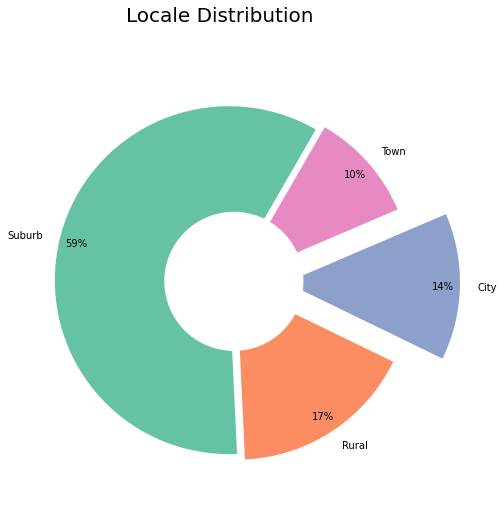

In [28]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Locale Distribution', size = 20, color = "black")
explode = ( 0.03, 0.03, 0.3, 0.03)
labels = list(districts_data.locale.value_counts().index)
sizes = districts_data["locale"].dropna().value_counts()
ax.pie(sizes, 
       explode = explode, 
       colors = sns.color_palette("Set2"),
       startangle = 60,
       labels = labels,
       autopct = '%1.0f%%',
       pctdistance = 0.9
      )
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

#**Educational Product Providers**

* Google provide most educational products then any one close to it
* In short online education is dominatied by Google LLC.

In [29]:
alt.Chart(products_data.dropna()).transform_aggregate(
        count='count()',
        groupby=['Provider/Company Name']
    ).transform_window(
        rank='rank(count)',
        sort=[alt.SortField('count', order='descending')]
    ).transform_filter(
        alt.datum.rank < 10
    ).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3).encode(
        y=alt.Y('Provider/Company Name:N', sort='-x'),
        x='count:Q',
        tooltip='count:Q',
        color=alt.Color('Provider/Company Name:O',
                    sort=alt.EncodingSortField(field="Provider/Company Name",op="count", order='descending'),
                    legend=None,scale=alt.Scale(scheme = 'set2')) 
    ).properties(title='Top Educational Product Providers')

alt.Chart(...)

**Let'see what are the products provided by Google**

In [30]:
products_data[products_data['Provider/Company Name']=='Google LLC']['Product Name'].value_counts().head(10).to_frame()

,Product Name
Google Books,1
Google Chrome,1
CHROME MUSIC LAB,1
Meet,1
Google Groups,1
Interland,1
Chrome Web Store,1
Kiddle,1
Google Calendar,1
Jamboard,1


#**Educational Sector Distributions**

* Educational sectors are divided into three categories, PreK-12, Higher Education, and Corporate.

* Some products are specific to a sector but others are quite general.

In [31]:
sector = products_data["Sector(s)"].value_counts().to_frame().reset_index()
sector.style.background_gradient(cmap="Set2", subset=['Sector(s)'])

,index,Sector(s)
0,PreK-12,170
1,PreK-12; Higher Ed; Corporate,115
2,PreK-12; Higher Ed,65
3,Corporate,1
4,Higher Ed; Corporate,1


**As we can see PreK education is dominating the distribution with 54 percentage.**

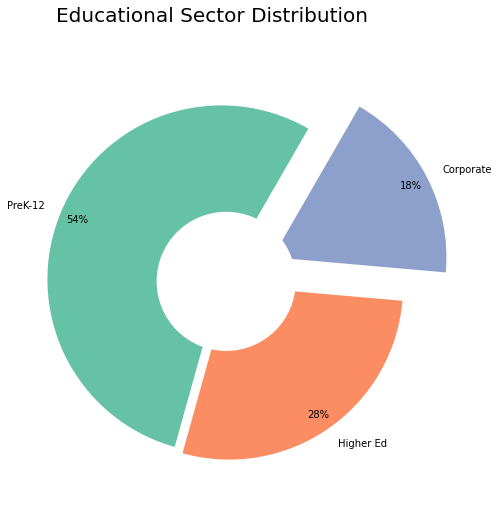

In [32]:
c1,c2,c3 = 0, 0, 0
for s in products_data["Sector(s)"]:
    if(not pd.isnull(s)):
        s = s.split(";")
        for i in range(len(s)):
            sub = s[i].strip()
            if(sub == 'PreK-12'): c1+=1
            if(sub == 'Higher Ed'): c2+=1
            if(sub == 'Corporate'): c3+=1

fig, ax  = plt.subplots(figsize=(16, 8))
                
fig.suptitle('Educational Sector Distribution', size = 20, color = "black")
explode = ( 0.03, 0.03, 0.3)
labels = ['PreK-12','Higher Ed','Corporate']
sizes = [c1,c2,c3]
ax.pie(sizes, 
       explode = explode, 
       colors = sns.color_palette("Set2"),
       startangle = 60,
       labels = labels,
       autopct = '%1.0f%%',
       pctdistance = 0.9
      )
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

#**Primary Functions with main and subcategories**

There are three types of main primary functions.

* LC = Learning & Curriculum.

* CM = Classroom Management.

* SDO = School & District Operations.

* You can interact with Plotly sunburst plot to explore the distribution of main categories and subcategories.

The Learning products have majority shares in this group and the most common subcategories are digital learning platforms.

In [33]:
PEF_cat_main = []
PEF_cat_sub = []
for p in products_data["Primary Essential Function"]:
    
    if (not pd.isnull(p)):
        cat1 = p.split("-",1)[0].strip()
        PEF_cat_main.append(cat1)
        
        cat2 = p.split("-",1)[1].strip()
        PEF_cat_sub.append(cat2)
    else:
        PEF_cat_main.append(np.nan)
        PEF_cat_sub.append(np.nan)
        
products_data["Essential_Function_main"] = PEF_cat_main
products_data["Essential_Function_sub"] = PEF_cat_sub

DE = (
    products_data[["Essential_Function_main", "Essential_Function_sub"]]
    .value_counts()
    .rename_axis(["Essential_Function_main", "Essential_Function_sub"])
    .reset_index(name="counts")
)

fig = px.sunburst(
    DE,
    path=["Essential_Function_main", "Essential_Function_sub"],
    values="counts",
    title="Sunburst Primary Essential Functions",
)
fig.show()

#**Essential Function Subcategories Distribution**

* We can observe all the subcategories distribution.

Content creation and digital learning are leading in this market.

In [34]:
fig = px.histogram(
    DE,
    x = "counts",
    y = "Essential_Function_sub",
    
    title="Primary Essential Function Sub-Categories",
)
fig.update_traces(marker = dict(
            color='mediumpurple'
            )),
fig.show()

#**Merging Three Datasets**

* We will be merging all three datasets on LP ID and district id. As we can see the combined dataset has 18 columns that will later help us with both geographical and time series plots.


In [ ]:
eng_data['time'] = pd.to_datetime(eng_data['time'])
eng_data["district_id"] = eng_data["district_id"].astype(str).astype(int)

In [ ]:
complete_data = products_data.merge(
                                   eng_data,
                                   left_on='LP ID', 
                                   right_on='lp_id'
                                   ).merge(
                                    districts_data,
                                    left_on='district_id',
                                    right_on='district_id'   
                                    )  # merging 3 datasets triggers memory warning    

In [ ]:
complete_data.head()

#**Top Educational Products**

* Google products are dominating with Wikipedia and Netflix as an exception. Netflix provides kids with educational seise and tutorials.

In [ ]:
complete_data['Product Name'].value_counts().head(20).to_frame()

#**Distribution of Race, Reduced Fee, Expenditures, and Internet connection per state**

* We will be used the Pandas function to display a table showing the mean distribution of various features related to demography and expenditures.

In [37]:
def mean_state_data(df,col):    
    return df[[col,'state']].\
    groupby(by='state').\
    mean().\
    reset_index().\
    sort_values(by= col, ascending = False).\
    style.background_gradient(cmap="Set2_r", subset=[col])

#**Black and Hispanic**

* I seems like Taxes have more Black/Hispanic students than another state followed by Florida, Michigan, and Minnesota.

In [ ]:
mean_state_data(complete_data,'pct_black/hispanic')

#**Reduced Fee or Free Education**

* Minnesota provides 70 percent of free or reduced fee education, followed by Michigan and Indiana.

In [ ]:
mean_state_data(complete_data,'pct_free/reduced')

#**Per-pupil total expenditure**

* New York spend more on education than any other State in US. The runner-up States are New Jersey and Minnesota

In [ ]:
mean_state_data(complete_data,'pp_total_raw')

#**Time Series Distribution of Educational Product Access Students**

* We will be observing time-series distributions of Product Access Based on Locale and State.

#**Based on Locale**

* The cities were hit with Covid19 the hardest which affected the students the most as they have to study from home that is why we can see the dip in product access from April to July 2020 as compared to other locales. During Summer vacation students stopped using educational products. In suburbs, students have more access to the tools then other locale. overall, they all follow a common pattern.

In [ ]:
locale = complete_data[["locale","pct_access","time"]].\
groupby(by=["time","locale"])\
.mean()\
.dropna()\
.reset_index()

fig = px.line(locale, x="time", y="pct_access", facet_col='locale',facet_col_wrap=1,color = 'locale')
fig.update_layout(
                      title=("Educational product Access per Locale").title(),
                     )
fig.show()

#**Based on Top Five States**

New York was hit hardest with Covid19 and that didn't affect the online learning of students as you can see graph became more consistent after the lockdown

* New York, Wisconsin, and Indian have higher students using these educational products overall.

In [ ]:
df = complete_data[["state","pct_access","time"]].groupby(by=["time","state"]).mean()
df.dropna(inplace =True)
df.reset_index(inplace = True)

top_5 = df.groupby(by='state')\
                  .mean()\
                  .sort_values(by='pct_access',ascending=False)\
                  .head(5)\
                  .reset_index()['state']\
                  .to_list()

top_states = df[df.state.isin(top_5)]
fig = px.line(top_states, x="time", y="pct_access", facet_col='state',facet_col_wrap=1,color = 'state')
fig.update_layout(
                      title=("Educational product Access on Top 5 States").title(),
                     )
fig.show()

#**Based on Bottom Five States**

* This is odd as Michigan and North Carolina have almost zero product access from March till the end of August. The Texas have a similar pattern but they had a peak in June. Overall these bottom states became active after September 2020.

* It is strange that some states have a very odd pattern, maybe due to a bad educational system or lack of awareness.

In [ ]:
bottom_5 = df.groupby(by='state')\
                  .mean()\
                  .sort_values(by='pct_access',ascending=False)\
                  .tail(5)\
                  .reset_index()['state']\
                  .to_list()

top_states = df[df.state.isin(bottom_5)]
fig = px.line(top_states, x="time", y="pct_access", facet_col='state',facet_col_wrap=1,color = 'state')
fig.update_layout(
                      title=("Educational product Access on Bottom 5 States").title(),
                     )
fig.show()

#**Geographical Analysis**

* In this section will be looking at different states based on product access and engagement index.

* We do not have access to all states data so you might see a lot of gray space on the map.

In [ ]:
geo_pct = complete_data[["state","pct_access"]]\
.groupby(by=["state"])\
.mean()\
.dropna()\
.reset_index()
geo = pd.read_csv('combined_data.csv')

geo_pct = pd.merge(geo_pct,geo,on = 'state', how = 'left')[['state','pct_access','code']]
geo_pct.head()

#**Education Products Access per State**

New York has a higher product access score than any other state, then comes Orange States Wisconson, Illinois, and Indiana. There might be a link between the lower population of Black/Hispanics in these states. Let's explore that in the next part.

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=geo_pct['code'], # Spatial coordinates
    z = geo_pct['pct_access'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'plasma',
    text = geo_pct['state'],
    colorbar_title = "product access",
))

fig.update_layout(
    title_text = 'Education Products access per state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

**There is a relation between states with lower the population of Black/Hispanic but it is not the stronger. I can see Newyork and Wisconsin with a lower Black/Hispanic population and higher access rate but when it comes to other states with a lower percentage of people of color it's all over the place. The system is fairly balanced towards other races.**

In [ ]:
Top_state = ['New York','Wisconson', 'Illinois','Indiana']
Race_state = complete_data[['state','pct_access','pct_black/hispanic']]\
.groupby('state')\
.mean()\
.dropna()\
.reset_index()\
.sort_values(by=['pct_black/hispanic','pct_access'])
Race_state

#**Engagement Index Per State**

* The Engagement distribution per state is quite similar to product access. It's logical that if students have access to these products there is a chance of an increase in usage of these platforms.

In [ ]:
geo_engag = complete_data[["state","engagement_index"]]\
.groupby(by=["state"])\
.mean()\
.dropna()\
.reset_index()
geo_engag = pd.merge(geo_engag,geo,on = 'state', how = 'left')[['state','engagement_index','code']]
geo_engag.head()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=geo_engag['code'], # Spatial coordinates
    z = geo_engag['engagement_index'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'plasma',
    text = geo_engag['state'],
    colorbar_title = "Engagement Index",
))

fig.update_layout(
    title_text = 'Education Products Engagement Index per state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

#**Focusing on People from Improvised Neighborhood**

* In this section, we will be focusing on the Black/Hispanic community and free or reduced fees.

#**Correlation**

* There is a high correlation between product access and engagement index, which means if the student has access to these products they might use them on daily basis. We can also see another high correlation between Black/Hispanic and Free/ Reduced education. This means the government is doing its job in helping improvised communities to get a proper education.

In [ ]:
sns.heatmap(complete_data.drop(['LP ID','lp_id','district_id'],axis=1).corr(), cmap="YlGnBu", annot=True);

#**Black/Hispanic products access over the year**

* The graph below shows that over time the communities with a lesser population of Blacks and Hispanics have a similar pattern to some of the Top states we have discussed earlier. Let's compare this graph with the mixed communities.

In [ ]:
Imp_neigh= complete_data[complete_data['pct_black/hispanic']<0.2][['time','pct_access','pct_black/hispanic']].groupby('time').mean().reset_index()
fig = px.line(Imp_neigh, x="time", y="pct_access")
fig.update_layout(
                      title=("Black/Hispanic community access to Online Education").title(),
                     )
fig.show()

**We can see some changes as the peak has fallen from 1.4 to 1.2. It is a disparity among the different racial groups but its marginal compares to other countries. We can say Black/Hispanic communities have lesser access to educational products.**

In [ ]:
Imp_neigh= complete_data[complete_data['pct_black/hispanic']>=0.2][['time','pct_access','pct_black/hispanic']].groupby('time').mean().reset_index()
fig = px.line(Imp_neigh, x="time", y="pct_access")
fig.update_layout(
                      title=("Black/Hispanic community access to Online Education").title(),
                     )
fig.show()

#**Conclusion**

* The data is limited to fewer states and I didn't found any concrete evidence that Black or Hispanic communities get unfair treatment. Online education is fairly balanced towards all. I did see how some of the states perform worst in terms of product access rating, this might be due to bad policymaking and lack of awareness. We can see that Google is dominating the online education industry by providing a complete ecosystem. The majority of Pre-K students are using these platforms for digital learning. Suburbs have the highest students accessing these products and we can see a clear correlation between product access and engagement index. There is also a high correlation between Black/Hispanic and Free education/ Reduced Fee, which means the government is doing its best to help the poor community by providing free education.